In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# Set random seed
np.random.seed(42)

In [13]:
# Load dataset
df = pd.read_csv("dataset.csv")

In [14]:
# Show dataset info
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (150, 10)
        PM2.5        PM10        NO2        SO2        CO          O3  \
0  118.616634  365.141037   9.909764  39.303052  1.855564   26.365726   
1  285.707149  111.033518  55.478690  28.803404  2.930185  141.576497   
2  222.278243   75.060051  56.360337  22.362656  1.934703   97.879127   
3  183.610960  205.992049  65.555841  45.505010  1.069285   56.886786   
4   55.245406  394.547173  73.978677   7.337479  1.382232   29.498090   

   Temperature   Humidity  WindSpeed         AQI  
0    16.236588  81.229117   3.912184  164.435680  
1    10.795966  57.025599   0.610641  173.595855  
2    15.443063  85.734739   0.599556  140.884064  
3    27.491247  75.914827   1.956246  142.862973  
4    22.642737  89.855388   2.698894  161.179884  


In [15]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
WindSpeed      0
AQI            0
dtype: int64


In [16]:
# Drop missing values (or handle them as needed)
df = df.dropna()

In [17]:
# Split dataset
X = df.drop("AQI", axis=1)
y = df["AQI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Predict
y_pred = model.predict(X_test)

In [20]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 376.69
R² Score: 0.85


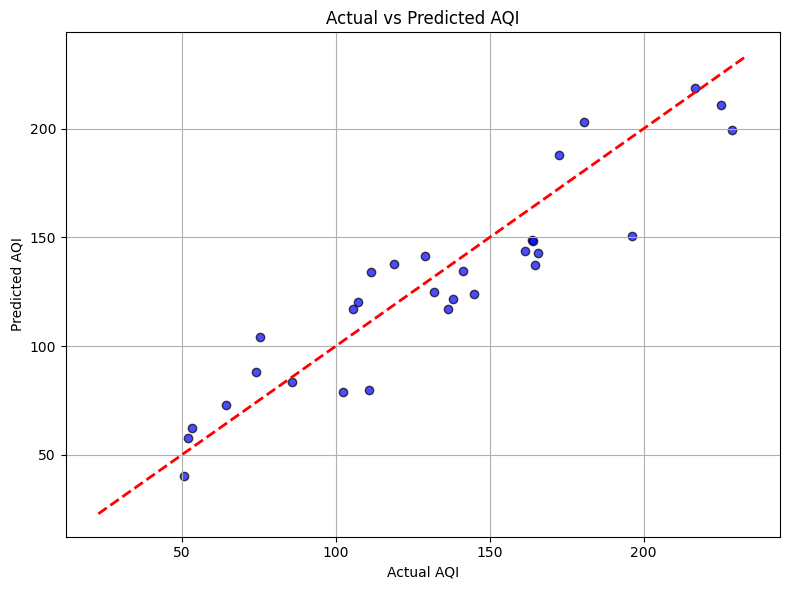

In [21]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Plot Feature Importance
importances = model.feature_importances_
features = X.columns

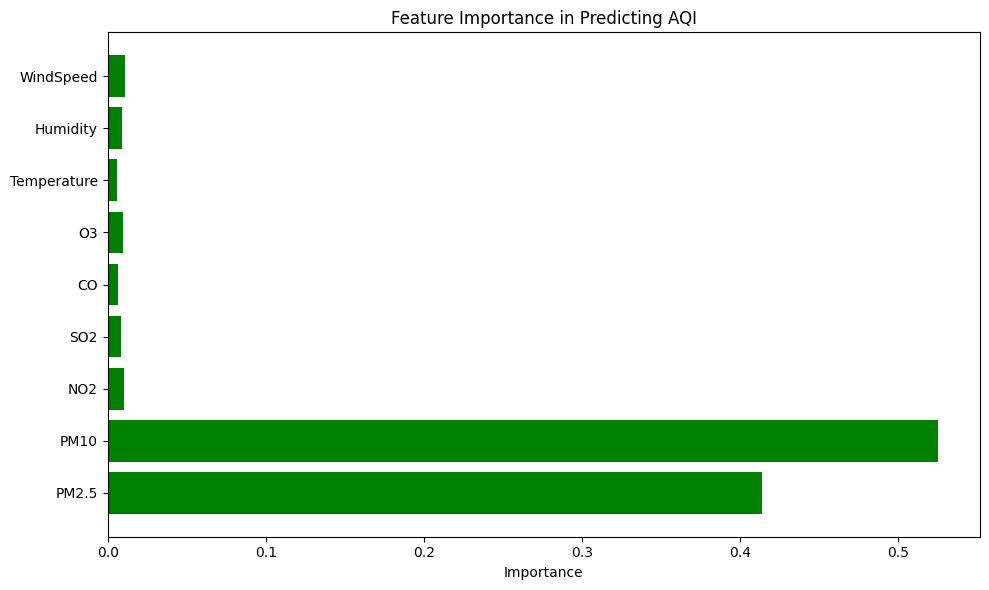

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='green')
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting AQI")
plt.tight_layout()
plt.show()